<a href="https://colab.research.google.com/github/bilychka-v/numeric_methods/blob/main/lab3_new/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Введіть початкове наближення для x: -0.5
Введіть початкове наближення для y: 0.5
Введіть мінімальне значення z: -3
Введіть максимальне значення z: -1
Введіть точність (наприклад, 1e-6): 1e-6
Iteration 1: x = -0.500000, y = 0.500000, accuracy = 1.4159802
Iteration 2: x = 0.550000, y = 1.450000, accuracy = 1.3328963
Iteration 3: x = 1.492500, y = 0.507500, accuracy = 0.2099312
Iteration 4: x = 1.344056, y = 0.655944, accuracy = 0.1336330
Iteration 5: x = 1.249563, y = 0.750437, accuracy = 0.0526006
Iteration 6: x = 1.212369, y = 0.787631, accuracy = 0.0137778
Iteration 7: x = 1.202627, y = 0.797373, accuracy = 0.0029622
Iteration 8: x = 1.200532, y = 0.799468, accuracy = 0.0006018
Iteration 9: x = 1.200107, y = 0.799893, accuracy = 0.0001207
Iteration 10: x = 1.200021, y = 0.799979, accuracy = 0.0000242
Iteration 11: x = 1.200004, y = 0.799996, accuracy = 0.0000048
Iteration 12: x = 1.200001, y = 0.799999, accuracy = 0.0000010
Solution for z = -3.00: x = 1.200001, y = 0.799999, iteration

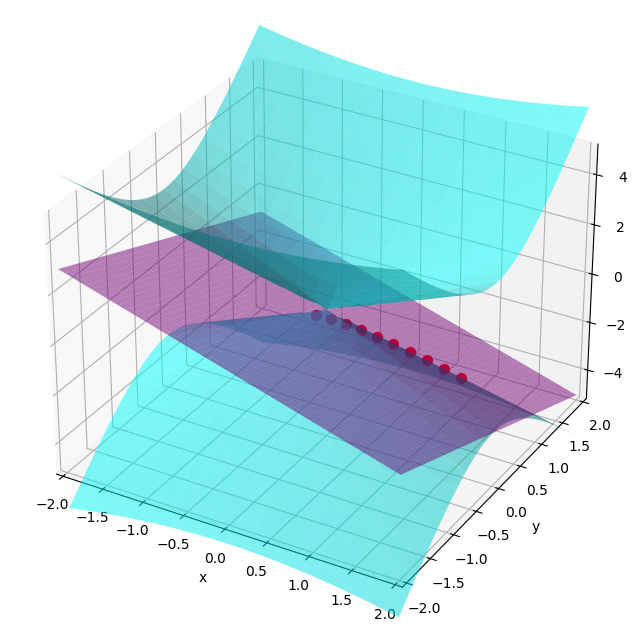

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, z):
    return np.array([
        x**2 / 4 + y**2 - z**2 / 9,  # Рівняння 1
        x + y + z + 1                # Рівняння 2
    ])

# Якобі-матриця для нових рівнянь
def jacobi(x, y):
    return np.array([
        [x / 2, 2 * y],  # Часткові похідні для f1
        [1, 1]           # Часткові похідні для f2
    ])

# Обчислення оберненої матриці Якобі
def invert_matrix(J):
    a, b = J[0]
    c, d = J[1]
    determinant = a * d - b * c

    if abs(determinant) < 1e-10:  # Перевірка на виродженість матриці
        raise ValueError("Матриця Якобі вироджена, оберненої не існує.")

    inverse = [
        [d / determinant, -b / determinant],
        [-c / determinant, a / determinant]
    ]
    return inverse

# Модифікований метод Ньютона
def newton_method(x0, y0, z_min, z_max, tol):
    z_values = np.linspace(z_min, z_max, 10)
    results = []

    # Обчислення Якобі один раз для початкових значень
    J0 = jacobi(x0, y0)
    J0_inv = invert_matrix(J0)  # Використання нашої функції для інверсії

    for idx, z in enumerate(z_values):
        x, y = x0, y0
        iteration = 0

        while True:
            F_val = f(x, y, z)  # Ініціалізуємо вектор системи рівнянь

            # Множення інверсії Якобі на F_val
            delta_x = J0_inv[0][0] * F_val[0] + J0_inv[0][1] * F_val[1]
            delta_y = J0_inv[1][0] * F_val[0] + J0_inv[1][1] * F_val[1]

            x_new = x - delta_x
            y_new = y - delta_y

            # Обчислення точності на кожній ітерації
            accuracy = np.sqrt((x_new - x)**2 + (y_new - y)**2)

            # Виведення значень змінних та точності на кожній ітерації
            print(f"Iteration {iteration + 1}: x = {x:.6f}, y = {y:.6f}, accuracy = {accuracy:.7f}")

            # Перевірка на збіжність
            if accuracy < tol:
                print("========================================================================")
                print(f"Solution for z = {z:.2f}: x = {x:.6f}, y = {y:.6f}, iterations = {iteration + 1}")
                results.append((z, x, y, iteration + 1))
                print("========================================================================")
                break

            # Оновлення x та y
            x = x_new
            y = y_new

            iteration += 1

    return results

# Графік поверхонь з точками розв'язків
def plot_surfaces(results):
    x = np.linspace(-2, 2, 200)
    y = np.linspace(-2, 2, 200)
    x, y = np.meshgrid(x, y)

    z_saddle = np.sqrt(np.maximum(0, (x**2 / 4 + y**2) * 9))
    z_saddle_negative = -z_saddle

    z_plane = -x - y - 1

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Поверхні
    ax.plot_surface(x, y, z_saddle, color='cyan', alpha=0.5, rstride=10, cstride=10)
    ax.plot_surface(x, y, z_saddle_negative, color='cyan', alpha=0.5, rstride=10, cstride=10)
    ax.plot_surface(x, y, z_plane, color='magenta', alpha=0.5)

    # Додавання знайдених точок
    for res in results:
        z, x_sol, y_sol, _ = res
        ax.scatter(x_sol, y_sol, z, color='red', s=50, label=f'({x_sol:.2f}, {y_sol:.2f}, {z:.2f})')

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-5, 5])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    plt.show()

# Основна програма
try:
    x0 = float(input("Введіть початкове наближення для x: "))
    y0 = float(input("Введіть початкове наближення для y: "))
    z_min = float(input("Введіть мінімальне значення z: "))
    z_max = float(input("Введіть максимальне значення z: "))
    tol = float(input("Введіть точність (наприклад, 1e-6): "))

    results = newton_method(x0, y0, z_min, z_max, tol)
    if results:
        print("\nЗнайдені розв'язки:")
        for res in results:
            print(f"Для z = {res[0]:.2f}: x = {res[1]:.6f}, y = {res[2]:.6f}, ітерацій = {res[3]}")
        plot_surfaces(results)  # Передаємо знайдені точки на графік
    else:
        print("Розв'язків не знайдено.")
except ValueError as e:
    print(f"Помилка: {e}")
